In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/heights.csv")

In [3]:
data.shape

(14, 2)

In [5]:
data.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [6]:
data.isnull().sum()

name      0
height    0
dtype: int64

In [10]:
data.notnull().sum()

name      14
height    14
dtype: int64

In [11]:
#detecting outliers

In [12]:
data.columns

Index(['name', 'height'], dtype='object')

In [13]:
data.dtypes

name       object
height    float64
dtype: object

In [17]:
max_t=data['height'].quantile(0.95)
max_t

9.689999999999998

In [18]:
data[data['height']>max_t]

,name,height
9,imran,14.5


In [19]:
min_t=data['height'].quantile(0.05)
min_t

3.6050000000000004

In [20]:
data[data['height']<min_t]

,name,height
12,yoseph,1.2


In [21]:
#Remove outliers 

In [24]:
data[(data['height']<max_t) &(data['height']>min_t)]

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [26]:
data1=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/bhp.csv")

In [27]:
data1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [28]:
data1.shape

(13200, 7)

In [29]:
data1.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [30]:
data1.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [31]:
#continuous data
x=data1.dtypes
x[x!=object]

total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [32]:
#categorical data
x[x==object]

location    object
size        object
dtype: object

In [33]:
#tretaing missing values

In [34]:
data1.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [35]:
data1.notnull().sum()

location          13200
size              13200
total_sqft        13200
bath              13200
price             13200
bhk               13200
price_per_sqft    13200
dtype: int64

In [37]:
data1.dtypes[data1.dtypes==object]

location    object
size        object
dtype: object

In [40]:
data1.location=data1.location.astype(dtype="category").cat.codes

In [50]:
data1['BHK'] = data1['size'].apply(lambda x: int(x.split(' ')[0]))

In [51]:
data1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,BHK
0,79,2 BHK,1056.0,2.0,39.07,2,3699,2
1,60,4 Bedroom,2600.0,5.0,120.00,4,4615,4
2,225,3 BHK,1440.0,2.0,62.00,3,4305,3
3,159,3 BHK,1521.0,3.0,95.00,3,6245,3
4,151,2 BHK,1200.0,2.0,51.00,2,4250,2


In [53]:
dt1=data1.drop(['size','BHK'],axis='columns')
dt1.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,79,1056.0,2.0,39.07,2,3699
1,60,2600.0,5.0,120.00,4,4615
2,225,1440.0,2.0,62.00,3,4305
3,159,1521.0,3.0,95.00,3,6245
4,151,1200.0,2.0,51.00,2,4250


# Removing outliers

In [55]:
max_t=dt1['price_per_sqft'].quantile(0.95)
max_t

15312.099999999984

In [56]:
dt1[dt1['price_per_sqft']>max_t]

,location,total_sqft,bath,price,bhk,price_per_sqft
7,195,3300.0,4.0,600.0,4,18181
9,240,1020.0,6.0,370.0,6,36274
45,93,600.0,9.0,200.0,8,33333
48,120,800.0,1.0,130.0,2,16250
69,240,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...
13142,240,1140.0,1.0,185.0,2,16228
13157,240,1400.0,7.0,218.0,7,15571
13185,109,500.0,1.0,220.0,1,44000
13186,240,1200.0,5.0,325.0,4,27083


In [57]:
min_t=dt1['price_per_sqft'].quantile(0.05)
min_t

3107.8500000000004

In [58]:
dt1[dt1['price_per_sqft']<min_t]

,location,total_sqft,bath,price,bhk,price_per_sqft
20,140,600.0,1.0,15.00,1,2500
41,204,1254.0,3.0,38.00,3,3030
89,78,1000.0,2.0,28.88,2,2888
99,58,650.0,1.0,17.00,2,2615
111,78,1530.0,2.0,45.90,3,3000
...,...,...,...,...,...,...
13101,22,520.0,1.0,15.00,1,2884
13105,58,520.0,1.0,14.04,1,2700
13121,79,1651.0,3.0,49.53,3,3000
13155,150,1600.0,4.0,45.00,4,2812


In [59]:
#remove outliers

In [60]:
dt1[(dt1['price_per_sqft']<max_t) &(dt1['price_per_sqft']>min_t)]

,location,total_sqft,bath,price,bhk,price_per_sqft
0,79,1056.0,2.0,39.07,2,3699
1,60,2600.0,5.0,120.00,4,4615
2,225,1440.0,2.0,62.00,3,4305
3,159,1521.0,3.0,95.00,3,6245
4,151,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...
13194,87,1715.0,3.0,112.00,3,6530
13195,234,3453.0,4.0,231.00,5,6689
13196,240,3600.0,5.0,400.00,4,11111
13197,194,1141.0,2.0,60.00,2,5258


# Outlier detection and removal using z-score and standard deviation in python pandas

In [76]:
data=pd.read_csv('C:\DataScience\Datasets\weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [77]:
data.shape

(10000, 3)

In [78]:
data.sample(5)

,Gender,Height,Weight
7328,Female,68.097689,152.179217
8636,Female,64.110821,139.245503
8341,Female,66.923992,155.758134
9845,Female,62.127480,136.783022
9946,Female,66.624544,149.828094


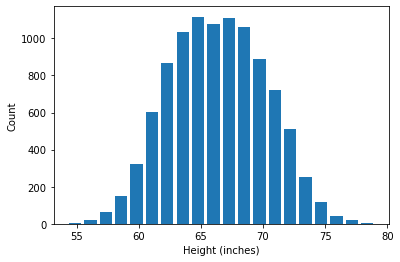

In [80]:
plt.hist(data.Height,bins=20,rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

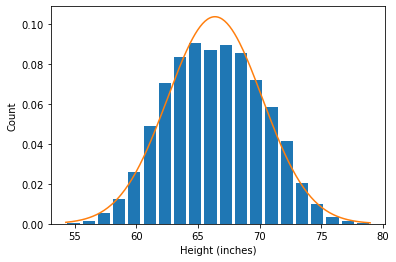

In [87]:
from scipy.stats import norm
plt.hist(data.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(data.Height.min(), data.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,data.Height.mean(),data.Height.std()))

In [88]:
data.Height.mean()

66.36755975482106

In [89]:
data.Height.std()

3.8475281207732324

# (1) Outlier detection and removal using 3 standard deviation


One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [90]:
upper_limit=data.Height.mean()+3*data.Height.std()
upper_limit

77.91014411714076

In [93]:
lower_limit=data.Height.mean()-3*data.Height.std()
lower_limit

54.82497539250136

In [94]:
data[(data['Height']<upper_limit)&(data['Height']>lower_limit)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

In [115]:
data['Zscore']=( data.Height - data.Height.mean() ) / data.Height.std()

In [116]:
data.head()

,Gender,Height,Weight,Z-score,Zscore
0,Male,73.847017,241.893563,1.943964,1.943964
1,Male,68.781904,162.310473,0.627505,0.627505
2,Male,74.110105,212.740856,2.012343,2.012343
3,Male,71.730978,220.042470,1.393991,1.393991
4,Male,69.881796,206.349801,0.913375,0.913375


# Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [117]:
(73.847017-66.36755975482106)/3.8475281207732324

1.94396428314494

Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [118]:
data[data['Zscore']>3]

,Gender,Height,Weight,Z-score,Zscore
994,Male,78.095867,255.690835,3.048271,3.048271
1317,Male,78.462053,227.342565,3.143445,3.143445
2014,Male,78.998742,269.989699,3.282934,3.282934
3285,Male,78.528210,253.889004,3.160640,3.160640
3757,Male,78.621374,245.733783,3.184854,3.184854


In [119]:
data[data['Zscore']<-3]

,Gender,Height,Weight,Z-score,Zscore
6624,Female,54.616858,71.393749,-3.054091,-3.054091
9285,Female,54.263133,64.700127,-3.146027,-3.146027


# Here is the list of all outliers

In [121]:
data[(data.Zscore<-3) | (data.Zscore>3)]

,Gender,Height,Weight,Z-score,Zscore
994,Male,78.095867,255.690835,3.048271,3.048271
1317,Male,78.462053,227.342565,3.143445,3.143445
2014,Male,78.998742,269.989699,3.282934,3.282934
3285,Male,78.528210,253.889004,3.160640,3.160640
3757,Male,78.621374,245.733783,3.184854,3.184854
6624,Female,54.616858,71.393749,-3.054091,-3.054091
9285,Female,54.263133,64.700127,-3.146027,-3.146027


# Remove the outliers and produce new dataframe

In [130]:
data_no_outlier=data[(data.Zscore>-3) & (data.Zscore<3)]
data_no_outlier

,Gender,Height,Weight,Z-score,Zscore
0,Male,73.847017,241.893563,1.943964,1.943964
1,Male,68.781904,162.310473,0.627505,0.627505
2,Male,74.110105,212.740856,2.012343,2.012343
3,Male,71.730978,220.042470,1.393991,1.393991
4,Male,69.881796,206.349801,0.913375,0.913375
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658,-0.050658
9996,Female,67.067155,170.867906,0.181830,0.181830
9997,Female,63.867992,128.475319,-0.649655,-0.649655
9998,Female,69.034243,163.852461,0.693090,0.693090


In [131]:
data_no_outlier.shape

(9993, 5)

In [132]:
data.shape

(10000, 5)

# Outlier Detection and Removal Using IQR(Inter Quartile Range)

In [133]:
df2=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/3_outlier_IQR/heights.csv")
df2.head()

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [135]:
df2.shape

(20, 2)

In [142]:
df2.dtypes

name       object
height    float64
dtype: object

In [145]:
df2.height.describe()

count    20.000000
mean      8.390000
std       8.782812
min       1.200000
25%       5.350000
50%       5.700000
75%       6.275000
max      40.200000
Name: height, dtype: float64

# Detect outliers using IQR

In [146]:
Q1=df2.height.quantile(0.25)
Q3=df2.height.quantile(0.75)
Q1,Q3

(5.3500000000000005, 6.275)

In [147]:
IQR=Q3-Q1
IQR

0.9249999999999998

In [148]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(3.962500000000001, 7.6625)

# Here are the outliers

In [149]:
df2[(df2.height<lower_limit)|(df2.height>upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


# Remove outliers

In [150]:
df2_no_outlier = df2[(df2.height>lower_limit)&(df2.height<upper_limit)]
df2_no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


# You can detect the outliers using boxplot too 

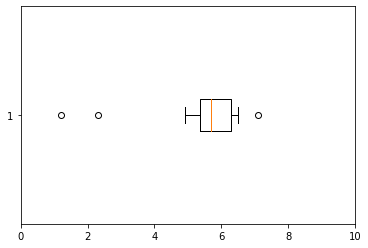

In [173]:
plt.xlim(0,10)
plt.boxplot(df2.height,vert=False, whis=0.75)
plt.show()